# K-means Clustering from Scratch

Unspervised algorithm: Finds groups in the data with number of groups 'k' being a parameter <br>
Algorithm: Iterative<br>
Data points clustered based on feature similarity<br>
Initialisation: K centroid values<br>
Inputs:<br> 
1.Data<br>
2.Number of clusters<br>
Results/Outputs: <br>
1.Centroids( to assign new data points)<br>
2.Labels of each data point <br>
Euclidean distance used to as feature similarity: $\underset{c_i \in C}{\arg\min} \; dist(c_i,x)^2$

Necessary module imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
from copy import deepcopy

Create data points

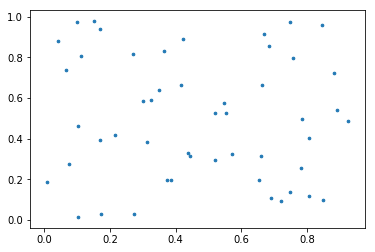

In [2]:
data_points = np.random.rand(50,2)
# print(data_points)
plt.scatter(data_points[:,0], data_points[:,1], s=7)

In [3]:
# Number of clusters
k = 3
# Number of training data
n = data_points.shape[0]
# Number of features in the data
c = data_points.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data_points, axis = 0)
std = np.std(data_points, axis = 0)
centers = np.random.randn(k,c)*std + mean
centers

array([[ 0.77631726,  0.98805351],
       [-0.04296007,  0.35951017],
       [ 0.77504327,  0.34289627]])

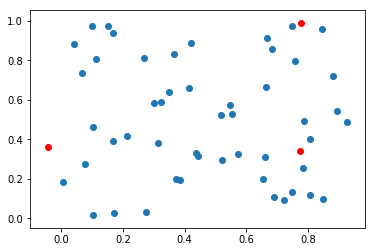

In [5]:
# Plot the data and the centers generated as random
plt.scatter(data_points[:,0], data_points[:,1])
plt.scatter(centers[:,0], centers[:,1], marker='o', c='r')

In [6]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data_points.shape
# clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data_points - centers[i], axis=1)
        print(distances)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data_points[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

[[0.62594468 0.         0.        ]
 [0.58608995 0.         0.        ]
 [0.07548943 0.         0.        ]
 [0.85216429 0.         0.        ]
 [0.55108075 0.         0.        ]
 [0.28684704 0.         0.        ]
 [0.68472102 0.         0.        ]
 [0.75082049 0.         0.        ]
 [0.73874525 0.         0.        ]
 [0.4396832  0.         0.        ]
 [1.18273679 0.         0.        ]
 [0.79843372 0.         0.        ]
 [0.69284524 0.         0.        ]
 [0.73284702 0.         0.        ]
 [0.60388609 0.         0.        ]
 [0.19446614 0.         0.        ]
 [0.52193089 0.         0.        ]
 [0.51102952 0.         0.        ]
 [1.00003692 0.         0.        ]
 [0.68750218 0.         0.        ]
 [0.7427047  0.         0.        ]
 [0.89440759 0.         0.        ]
 [0.53599885 0.         0.        ]
 [0.48669148 0.         0.        ]
 [0.85589097 0.         0.        ]
 [1.11193916 0.         0.        ]
 [0.46170627 0.         0.        ]
 [0.49338015 0.         0.  

array([[0.54171218, 0.8788175 ],
       [0.16965023, 0.46261813],
       [0.64142791, 0.34217221]])

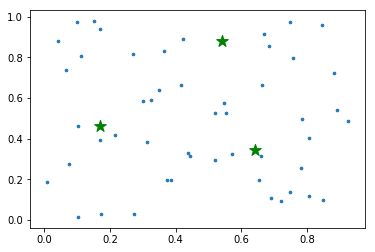

In [7]:
# Plot the data and the centers generated as random
plt.scatter(data_points[:,0], data_points[:,1], s=7)
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

In [8]:
centers

array([[ 0.77631726,  0.98805351],
       [-0.04296007,  0.35951017],
       [ 0.77504327,  0.34289627]])

In [9]:
clusters

array([1, 2, 0, 2, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 0, 2, 2, 1, 1, 1, 2,
       0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 1,
       0, 2, 1, 0, 0, 2], dtype=int64)